In [3]:
import pandas as pd
import numpy as np
import os
import config

In [4]:
metadata = pd.read_csv(os.path.join(config.CLEAN_DIR, "metadata.tsv"), sep="\t", index_col=0)
metadata

,Patient_No,Hospital,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_anomoly,Abx_timeline.prior..during..after.,abx_day,Consistency,...,expo_cat1,expo_cat2,calc_age_mo,currentfeed_bf,currentfeed_f,currentfeed_o,Sequencing_Project,Filename,Extraction,depth
Sample_ID,,,,,,,,,,,,,,,,,,,,,
magic.0001,101,no,12/10/16,1430,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.07,1.0,0.0,magic.0001,Knights_Project_046,magic.0001.S22.001.fa,MagAttract,1544781
magic.0004,101,no,12/15/16,NaN,1,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.23,1.0,0.0,magic.0004,Knights_Project_046,magic.0004.S34.001.fa,MagAttract,1167038
magic.0006,104,yes,12/15/16,2335,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.03,1.0,1.0,magic.0006,Knights_Project_076_Pool3,magic.0006.S145.001.fa,PowerSoil,1720636
magic.0007,105,yes,12/15/16,2115,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.03,1.0,1.0,magic.0007,Knights_Project_076_Pool3,magic.0007.S155.001.fa,PowerSoil,6825017
magic.0008,105,yes,12/15/16,1525,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.03,1.0,1.0,magic.0008,Knights_Project_055,X8.S125.001.fa,PowerSoil,2928044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,588,NaN,8/22/21,1702,96,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,24.11,NaN,NaN,magic.6595,Knights_Project_077_Pool3,magic.6595.S253.001.fa,PowerSoilPro,1562968
magic.6597,595,NaN,9/6/21,NaN,96,regular,NaN,NaN,NaN,formed,...,No antibiotics,Vaginal,24.11,NaN,NaN,magic.6597,Knights_Project_077_Pool3,magic.6597.S265.001.fa,PowerSoilPro,2113880
magic.6598,585,NaN,8/23/21,725,96,regular,NaN,NaN,NaN,formed,...,GBS antibiotics,C-section with labor,24.34,NaN,NaN,magic.6598,Knights_Project_077_Pool3,magic.6598.S277.001.fa,PowerSoilPro,1650388


In [5]:
has_colibactin = pd.read_csv(os.path.join(config.CLEAN_DIR, "has_colibactin.to_csv"), index_col=0)
has_colibactin = has_colibactin.loc[metadata.index]
has_colibactin

,Bins
Sample_ID,
magic.0001,False
magic.0004,False
magic.0006,True
magic.0007,True
magic.0008,False
...,...
magic.6595,False
magic.6597,False
magic.6598,False


In [6]:
all(has_colibactin.index == metadata.index)

True

In [7]:
metadata["has_colibactin"] = has_colibactin
metadata

,Patient_No,Hospital,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_anomoly,Abx_timeline.prior..during..after.,abx_day,Consistency,...,expo_cat2,calc_age_mo,currentfeed_bf,currentfeed_f,currentfeed_o,Sequencing_Project,Filename,Extraction,depth,has_colibactin
Sample_ID,,,,,,,,,,,,,,,,,,,,,
magic.0001,101,no,12/10/16,1430,0,regular,NaN,NaN,NaN,NaN,...,Vaginal,0.07,1.0,0.0,magic.0001,Knights_Project_046,magic.0001.S22.001.fa,MagAttract,1544781,False
magic.0004,101,no,12/15/16,NaN,1,regular,NaN,NaN,NaN,NaN,...,Vaginal,0.23,1.0,0.0,magic.0004,Knights_Project_046,magic.0004.S34.001.fa,MagAttract,1167038,False
magic.0006,104,yes,12/15/16,2335,0,regular,NaN,NaN,NaN,NaN,...,Vaginal,0.03,1.0,1.0,magic.0006,Knights_Project_076_Pool3,magic.0006.S145.001.fa,PowerSoil,1720636,True
magic.0007,105,yes,12/15/16,2115,0,regular,NaN,NaN,NaN,NaN,...,Vaginal,0.03,1.0,1.0,magic.0007,Knights_Project_076_Pool3,magic.0007.S155.001.fa,PowerSoil,6825017,True
magic.0008,105,yes,12/15/16,1525,0,regular,NaN,NaN,NaN,NaN,...,Vaginal,0.03,1.0,1.0,magic.0008,Knights_Project_055,X8.S125.001.fa,PowerSoil,2928044,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,588,NaN,8/22/21,1702,96,regular,NaN,NaN,NaN,NaN,...,Vaginal,24.11,NaN,NaN,magic.6595,Knights_Project_077_Pool3,magic.6595.S253.001.fa,PowerSoilPro,1562968,False
magic.6597,595,NaN,9/6/21,NaN,96,regular,NaN,NaN,NaN,formed,...,Vaginal,24.11,NaN,NaN,magic.6597,Knights_Project_077_Pool3,magic.6597.S265.001.fa,PowerSoilPro,2113880,False
magic.6598,585,NaN,8/23/21,725,96,regular,NaN,NaN,NaN,formed,...,C-section with labor,24.34,NaN,NaN,magic.6598,Knights_Project_077_Pool3,magic.6598.S277.001.fa,PowerSoilPro,1650388,False


In [8]:
df = pd.read_csv("../data/raw/species_rarefied.txt", sep="\t")
df = df.T
df

,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae;g__Enterococcus;s__Enterococcus_faecalis,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Klebsiella;s__Klebsiella_pneumoniae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_C,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_D,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_flexneri,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Leclercia;s__Leclercia_sp002902985,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_sp005843885,k__Bacteria;p__Firmicutes;c__Bacilli;o__Staphylococcales;f__Staphylococcaceae;g__Staphylococcus;s__Staphylococcus_epidermidis,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__Streptococcus_pseudopneumoniae_O,...,k__Bacteria;p__Patescibacteria;c__CPR2;o__CG2-30-33-46;f__CG2-30-33-46;g__CG2-30-33-46;s__CG2-30-33-46_sp002792735,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Cellvibrionaceae;g__Agarilytica;s__Agarilytica_rhodophyticola,k__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Mycobacteriales;f__Pseudonocardiaceae;g__Pseudonocardia;s__Pseudonocardia_sp001294645,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Gallionellaceae;g__Nitrotoga;s__Nitrotoga_sp002470125,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__UBA935;s__UBA935_sp002293525,k__Bacteria;p__Firmicutes;c__Bacilli;o__RFN20;f__CAG-288;g__UBA7642;s__UBA7642_sp900313465,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae;g__Flavobacterium;s__Flavobacterium_aquidurense_B,k__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales;f__UBA9464;g__SXXZ01;s__SXXZ01_sp005789375,k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Amphibacillaceae;g__Virgibacillus;s__Virgibacillus_sp000480335,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__UBA1066;s__UBA1066_sp900319795
magic.0007,105,228,39403,925,170947,3011,2,163,4,0,...,0,0,0,0,0,0,0,0,0,0
magic.0008,1,144,23646,537,107325,726,1,62,1,0,...,0,0,0,0,0,0,0,0,0,0
magic.0010,3533,148,26439,2166,19611,28972,0,784,32,0,...,0,0,0,0,0,0,0,0,0,0
magic.0012,58,526,80131,1518,367871,2149,3,175,390,27,...,0,0,0,0,0,0,0,0,0,0
magic.0014,44507,15062,760790,5379,34244,5542,1,662,766,13,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,7,312,283,7,64,17,3,3,2,10,...,0,0,0,0,0,0,0,0,0,0
magic.6597,6,7,31,9,60,13,0,1,7,1,...,0,0,0,0,0,0,0,0,0,0
magic.6598,6,14,2493,43,219,83,0,12,12,1,...,0,0,0,0,0,0,0,0,0,1
magic.6599,7,8,1280,87,758,339,0,21,3,2,...,0,0,0,0,0,0,0,0,0,0


In [9]:
in_both = list(set(df.index) & set(metadata.index))

In [10]:
corr_df = df.loc[in_both]
corr_df["has_colibactin"] = metadata.loc[in_both]["has_colibactin"]
corr_df

,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae;g__Enterococcus;s__Enterococcus_faecalis,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Klebsiella;s__Klebsiella_pneumoniae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_C,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_D,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_flexneri,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Leclercia;s__Leclercia_sp002902985,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_sp005843885,k__Bacteria;p__Firmicutes;c__Bacilli;o__Staphylococcales;f__Staphylococcaceae;g__Staphylococcus;s__Staphylococcus_epidermidis,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__Streptococcus_pseudopneumoniae_O,...,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Cellvibrionaceae;g__Agarilytica;s__Agarilytica_rhodophyticola,k__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Mycobacteriales;f__Pseudonocardiaceae;g__Pseudonocardia;s__Pseudonocardia_sp001294645,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Gallionellaceae;g__Nitrotoga;s__Nitrotoga_sp002470125,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__UBA935;s__UBA935_sp002293525,k__Bacteria;p__Firmicutes;c__Bacilli;o__RFN20;f__CAG-288;g__UBA7642;s__UBA7642_sp900313465,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae;g__Flavobacterium;s__Flavobacterium_aquidurense_B,k__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales;f__UBA9464;g__SXXZ01;s__SXXZ01_sp005789375,k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Amphibacillaceae;g__Virgibacillus;s__Virgibacillus_sp000480335,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__UBA1066;s__UBA1066_sp900319795,has_colibactin
magic.2134,11,415214,283803,10734,25884,10731,620,2033,731,20,...,0,0,0,0,0,0,0,0,0,True
magic.2159,6,83,1043,30,237,52,0,9,3,9,...,0,0,0,0,0,0,0,0,0,False
magic.1400,317,339891,21469,513,2653,1801,2168,142,15,3,...,0,0,0,0,0,0,0,0,0,False
magic.2298,46,262,78983,2482,9967,3992,0,768,5,29,...,0,0,0,0,0,0,0,0,0,False
magic.6300,2,3,644,38,296,69,0,6,4,1,...,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.1208,9,31398,933,68,816,922,45,33,0,0,...,0,0,0,0,0,0,0,0,0,False
magic.6017,9,1746,100,3,22,3,0,0,0,6,...,0,0,0,0,0,0,0,0,0,False
magic.5031,56,505,9083,167,1594,489,13,63,6,1,...,0,0,0,0,0,0,0,0,0,True
magic.1717,48690,1477,500081,10067,77833,20852,0,1661,2349,10,...,0,0,0,0,0,0,0,0,0,False


In [11]:
from tqdm import tqdm

corr = {}

for col in tqdm(corr_df.columns):
#     corr[col] = np.stats.corr(corr_df[col], corr_df["has_colibactin"])
    corr[col] = corr_df[[col, "has_colibactin"]].corr().iloc[0, 1]

100%|██████████████████████████████████████████████████████████████████████████████████████████| 12107/12107 [00:06<00:00, 1742.09it/s]


In [12]:
taxa_corr = pd.DataFrame(corr, index=['corr']).T
taxa_corr.sort_values("corr", ascending=False).head(20)

,corr
has_colibactin,1.000000
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli,0.267708
k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Peptostreptococcales;f__Anaerovoracaceae;g__CAG-238;s__CAG-238_sp900551415,0.207167
k__Bacteria;p__Firmicutes_A;c__Clostridia_A;o__Christensenellales;f__CAG-74;g__SFMI01;s__SFMI01_sp004556155,0.183357
k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__Streptococcus_sp900546335,0.177939
k__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Mycobacteriales;f__Mycobacteriaceae;g__Corynebacterium;s__Corynebacterium_heidelbergense,0.166688
k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella;s__Prevotella_sp004557285,0.165113
k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Monoglobales_A;f__UBA1381;g__CAG-41;s__CAG-41_sp001941225,0.162477
k__Bacteria;p__Firmicutes;c__Bacilli;o__Brevibacillales;f__Brevibacillaceae;g__CFH-S0501;s__CFH-S0501_sp004521915,0.134425
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Yersinia;s__Yersinia_pestis,0.132173


In [13]:
taxa_corr.sort_values("corr", ascending=True).head(20)

,corr
k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__CAG-590;s__CAG-590_sp900548855,-0.088547
k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Phocaeicola;s__Phocaeicola_sp900556845,-0.084511
k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lachnoclostridium_A;s__Lachnoclostridium_A_edouardi,-0.082209
k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Tannerellaceae;g__Parabacteroides;s__Parabacteroides_sp900552415,-0.079663
k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides;s__Bacteroides_bouchesdurhonensis,-0.078640
k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Phocaeicola;s__Phocaeicola_sp900557085,-0.078547
k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Phocaeicola;s__Phocaeicola_vulgatus,-0.075924
k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides;s__Bacteroides_caecimuris,-0.075694
k__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelatoclostridiaceae;g__Erysipelatoclostridium;s__Erysipelatoclostridium_sp000752095,-0.074281
k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Butyricicoccaceae;g__Agathobaculum;s__Agathobaculum_butyriciproducens,-0.073629


In [14]:
import pickle

with open(os.path.join("../output/logs", "association_dict_prop.pkl"), "rb") as f:
    ass = pickle.load(f)

In [15]:
p_cutoff = 0

ass_dict_retained = [a for a in ass if a["p"] <= p_cutoff]

len(ass_dict_retained)

2691

In [16]:
CAG = pd.read_csv(os.path.join(config.RAW_DIR, "profiles_allgenes_inputfilter.txt"), sep="\t", index_col=0, header=None).iloc[:, :-1]
temp_meta = pd.read_csv(os.path.join(config.CLEAN_DIR, "metadata.tsv"), sep="\t")
CAG.columns = temp_meta["Sample_ID"]
CAG = CAG.T
CAG

,CAG00001,CAG00002,CAG00003,CAG00004,CAG00005,CAG00006,CAG00007,CAG00008,CAG00009,CAG00010,...,CAG27809,CAG27810,CAG27811,CAG27812,CAG27813,CAG27814,CAG27815,CAG27816,CAG27817,CAG27818
Sample_ID,,,,,,,,,,,,,,,,,,,,,
magic.0001,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000019,0.0,0.000000,0.000000,2.474750e-06,0.0
magic.0004,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000005,0.0,0.000000,0.000000,2.309360e-06,0.0
magic.0006,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,9.946710e-07,0.0
magic.0007,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.519240e-06,0.000000,...,0.000000,8.095020e-07,0.000001,0.000045,0.000007,0.0,0.000000,0.000146,1.886600e-05,0.0
magic.0008,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,3.104770e-07,0.000000,...,0.000000,0.000000e+00,0.000001,0.000020,0.000000,0.0,0.000000,0.000089,5.444550e-06,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,0.0,0.0,0.0,0.0,0.000024,0.0,0.000036,0.000000,0.000000e+00,0.000683,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0
magic.6597,0.0,0.0,0.0,0.0,0.000041,0.0,0.000004,0.000000,0.000000e+00,0.000009,...,0.000018,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000021,0.000000,0.000000e+00,0.0
magic.6598,0.0,0.0,0.0,0.0,0.000015,0.0,0.000007,0.000007,0.000000e+00,0.000086,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0


In [17]:
all(metadata.index == CAG.index)

True

In [20]:
clusters = pd.read_csv(os.path.join(config.RAW_DIR, "clusters_allgenes_inputfilter.txt"), sep="\t", index_col=0, header=None)
clusters

,1
0,
CAG00001,UniRef90_A0A378A6L7
CAG00001,UniRef90_A0A2X1RLT4
CAG00001,UniRef90_A0A333FLJ3
CAG00001,UniRef90_V5ADF3
CAG00001,UniRef90_UPI000A3C0D9B
...,...
CAG27816,UniRef90_A0A148HQ34
CAG27817,UniRef90_UPI0002A368F9
CAG27817,UniRef90_A0A2X3M0Q2


In [23]:
counts = clusters.groupby(level=0).count()
counts

,1
0,
CAG00001,11642
CAG00002,4384
CAG00003,3993
CAG00004,3677
CAG00005,3259
...,...
CAG27814,2
CAG27815,2
CAG27816,2


In [61]:
ratios = []

for rel in ass_dict_retained:
    h, d = rel["host"], rel["dependent"]
#     if counts.loc[h][1] < 100: continue
    ratio = CAG[d] / CAG[h]
    ratios.append(ratio)

In [62]:
ratio_df = pd.DataFrame(ratios).T
ratio_df = ratio_df.replace([np.inf, -np.inf], np.nan)
ratio_df = ratio_df.replace([0], np.nan)
ratio_df

,0,1,2,3,4,5,6,7,8,9,...,2681,2682,2683,2684,2685,2686,2687,2688,2689,2690
Sample_ID,,,,,,,,,,,,,,,,,,,,,
magic.0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
magic.0004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
magic.0006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
magic.0007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.180856,NaN,NaN,...,NaN,NaN,NaN,NaN,1.662277,2.591794,NaN,2.336846,NaN,NaN
magic.0008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.366630,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.442177,NaN,NaN,NaN,NaN,NaN,NaN,0.577488,0.777062
magic.6597,NaN,NaN,NaN,NaN,NaN,NaN,0.669004,NaN,NaN,NaN,...,NaN,0.010083,0.022922,NaN,NaN,NaN,NaN,NaN,NaN,NaN
magic.6598,NaN,NaN,NaN,NaN,NaN,NaN,0.735975,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.866286


In [63]:
from scipy.stats import ranksums

In [64]:
mean_ratio_df = ratio_df.mean(skipna=True, axis=1)
mean_ratio_df = pd.DataFrame(mean_ratio_df, columns=["ratio"])
mean_ratio_df

,ratio
Sample_ID,
magic.0001,0.864536
magic.0004,0.841865
magic.0006,0.919130
magic.0007,0.980911
magic.0008,1.666634
...,...
magic.6595,0.791461
magic.6597,0.426041
magic.6598,0.603970


In [65]:
mean_ratio_df["has_colibactin"] = metadata['has_colibactin']
mean_ratio_df["Timeline_Weeks"] = metadata["Timeline_Weeks"]
mean_ratio_df

,ratio,has_colibactin,Timeline_Weeks
Sample_ID,,,
magic.0001,0.864536,False,0
magic.0004,0.841865,False,1
magic.0006,0.919130,True,0
magic.0007,0.980911,True,0
magic.0008,1.666634,False,0
...,...,...,...
magic.6595,0.791461,False,96
magic.6597,0.426041,False,96
magic.6598,0.603970,False,96


In [66]:
mean_ratio_df = mean_ratio_df[~mean_ratio_df["ratio"].isna()]

In [67]:
has = mean_ratio_df[mean_ratio_df["has_colibactin"]]["ratio"]
no_has = mean_ratio_df[~mean_ratio_df["has_colibactin"]]["ratio"]
ranksums(has, no_has)

RanksumsResult(statistic=13.803431195528699, pvalue=2.4300523976811335e-43)

In [68]:
mean_ratio_df

,ratio,has_colibactin,Timeline_Weeks
Sample_ID,,,
magic.0001,0.864536,False,0
magic.0004,0.841865,False,1
magic.0006,0.919130,True,0
magic.0007,0.980911,True,0
magic.0008,1.666634,False,0
...,...,...,...
magic.6595,0.791461,False,96
magic.6597,0.426041,False,96
magic.6598,0.603970,False,96


In [70]:
import matplotlib.pyplot as plt

plot_has = []
plot_no_has = []

times = [t for t in metadata["Timeline_Weeks"].unique() if t not in ["na", np.nan]]
ranksum_info = []

for t in times:
    is_time = mean_ratio_df["Timeline_Weeks"] == t
    cur_has = mean_ratio_df[mean_ratio_df["has_colibactin"] & is_time]["ratio"]
    plot_has.append(cur_has.median())
    cur_no_has = mean_ratio_df[~mean_ratio_df["has_colibactin"] & is_time]["ratio"]
    plot_no_has.append(cur_no_has.median())
    test = ranksums(cur_has, cur_no_has)
    ranksum_info.append({"t" : t, "stat" : test.statistic, "p" : test.pvalue})
#     u, man_whitney_u_p_val = mannwhitneyu(cur_has, cur_no_has)
#     ranksum_info.append({"t" : t, "stat" : u, "p" : man_whitney_u_p_val})
    
plt.figure(figsize=(10, 5), dpi=200)

time_int = [int(t) for t in times]
ranksum_df = pd.DataFrame(ranksum_info).set_index("t")
ranksum_df["sig"] = ranksum_df["p"] <= 0.05

ranksum_df

,stat,p,sig
t,,,
0,3.649755,2.624906e-04,True
1,4.046620,5.196256e-05,True
2,3.827382,1.295135e-04,True
3,3.203192,1.359132e-03,True
4,4.824360,1.404533e-06,True
12,3.368597,7.555189e-04,True
24,6.137039,8.407351e-10,True
36,0.994992,3.197403e-01,False
48,3.094143,1.973825e-03,True


<Figure size 2000x1000 with 0 Axes>

In [71]:
mean_ratio_df

,ratio,has_colibactin,Timeline_Weeks
Sample_ID,,,
magic.0001,0.864536,False,0
magic.0004,0.841865,False,1
magic.0006,0.919130,True,0
magic.0007,0.980911,True,0
magic.0008,1.666634,False,0
...,...,...,...
magic.6595,0.791461,False,96
magic.6597,0.426041,False,96
magic.6598,0.603970,False,96


In [72]:
mean_ratio_df["Timeline_Weeks"].unique()

array(['0', '1', '2', '3', '4', nan, '12', '24', 'na', '36', '48', '60',
       '72', '84', '96'], dtype=object)

Text(0, 0.5, 'Mean phage to host ratio')

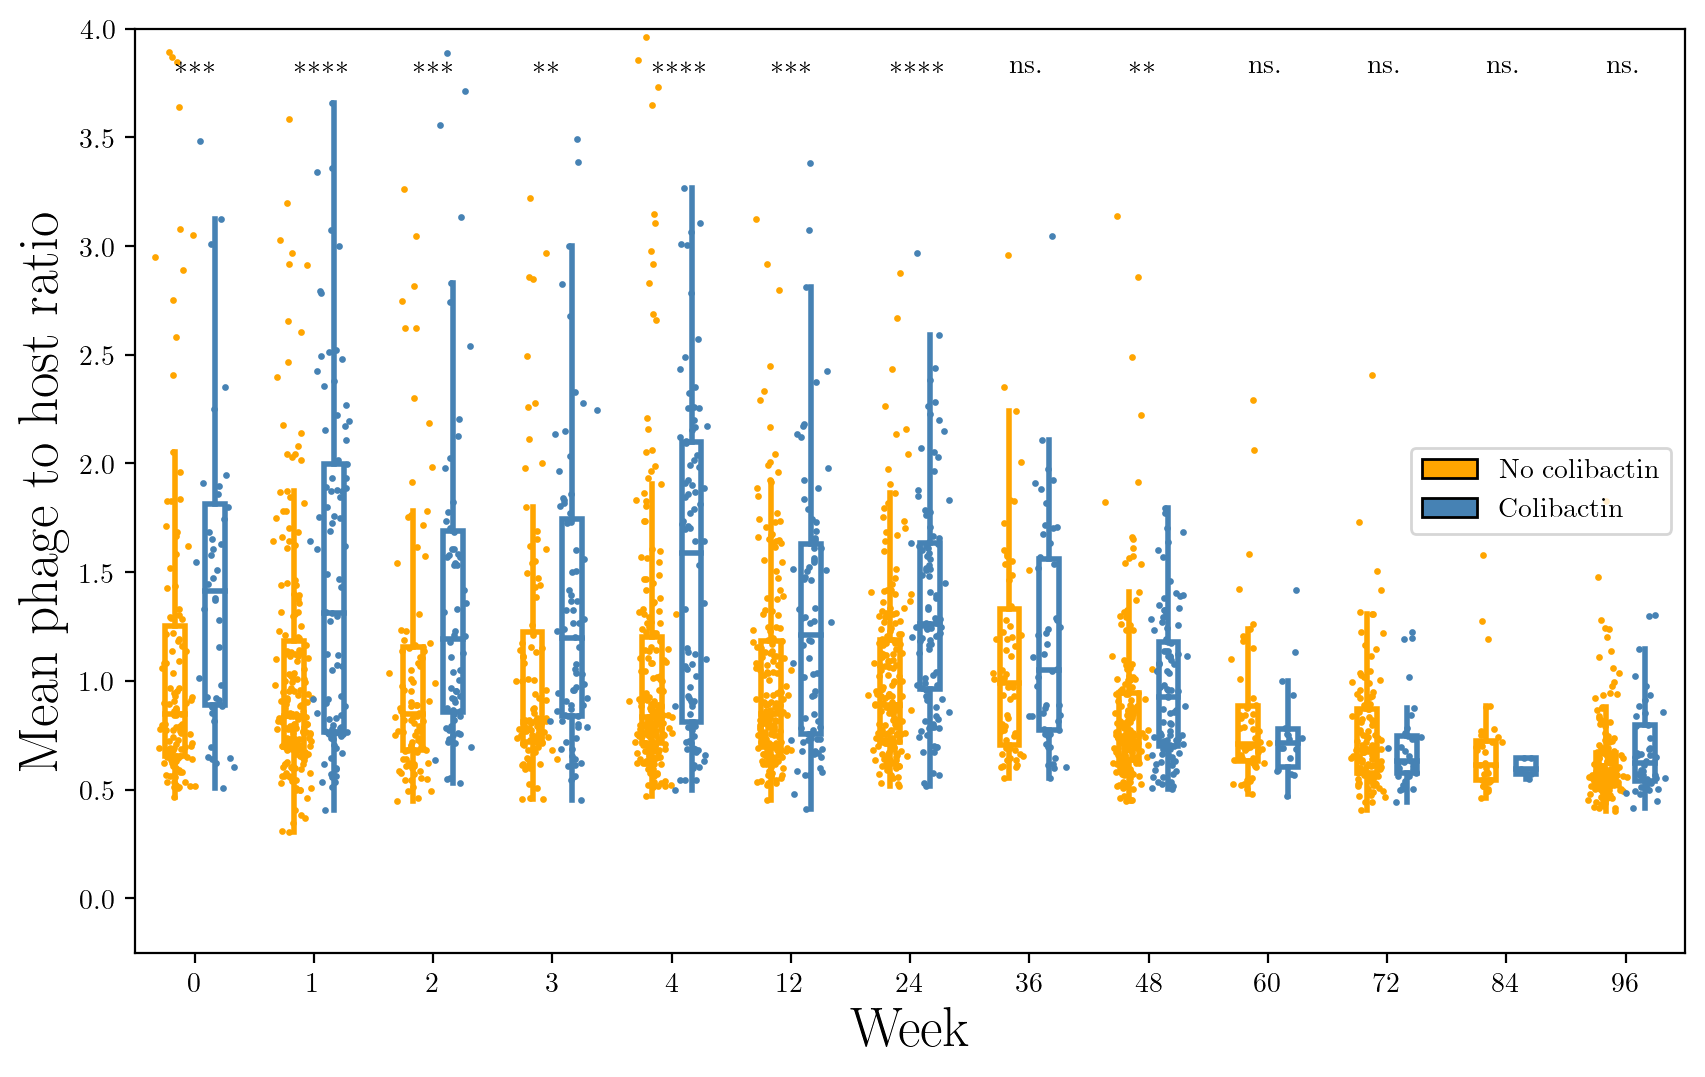

In [93]:
fig = plt.figure(figsize=(10, 6), dpi=200)
ax = plt.gca()
weeks = np.array([0, 1, 2, 3, 4, 12, 24, 36, 48, 60, 72, 84, 96])
# weeks = [0, 1, 2, 3, 4]
spacing = 1.5

for i, week in enumerate(weeks):
    p = ranksum_df.loc[str(week)]["p"]
    text = "****" if p <= 0.0001 else "***" if p <= 0.001 else "**" if p <= 0.01 else "*" if p <= 0.05 else "ns."
    plt.text(i * spacing, 3.8, text)
        
    
    for j, has in enumerate([False, True]):
        data = mean_ratio_df[(mean_ratio_df["Timeline_Weeks"] == str(week)) & (mean_ratio_df["has_colibactin"] == has)]["ratio"]
#         x_pos = np.ones(data.shape[0]) * int(week) * spacing
        x_pos = np.ones(data.shape[0]) * i * spacing
        scale = 0.1
        x_pos = x_pos + np.random.normal(scale=scale, size=x_pos.shape) + j / 2
        sc = ax.scatter(x_pos, data, s=2, color="steelblue" if has else "orange")
        
        c = sc.get_facecolors()[0].tolist()
        width = 2
        widths = 0.25
#         bp = ax.boxplot(data, positions=[spacing * int(week) + j / 2], patch_artist=True, widths=[widths], showfliers=False,
        bp = ax.boxplot(data, positions=[spacing * i + j / 2], patch_artist=True, widths=[widths], showfliers=False,
            boxprops=dict(facecolor=[0, 0, 0, 0], color=c, linewidth=width),
            capprops=dict(color=c, linewidth=0),
            whiskerprops=dict(color=c, linewidth=width),
            flierprops=dict(color=c, markeredgecolor=c, linewidth=width),
            medianprops=dict(color=c, linewidth=width))
        
plt.ylim(-0.25, 4)

# plt.plot(np.arange(len(weeks)) * spacing, plot_has, c="steelblue")
# plt.plot(np.arange(len(weeks)) * spacing + 0.5, plot_no_has, c="orange")


from matplotlib.patches import Patch

legend_elements = [
    Patch(facecolor='orange', edgecolor='k', label='No colibactin'),
    Patch(facecolor='steelblue', edgecolor='k', label='Colibactin')
]

plt.legend(handles=legend_elements, loc=5)
        
plt.xticks(ticks=[i * spacing + 0.25 for i in range(len(weeks))], labels=weeks)
plt.xlabel("Week", fontsize=20)
plt.ylabel("Mean phage to host ratio", fontsize=20)


In [77]:
data = mean_ratio_df[(mean_ratio_df["Timeline_Weeks"] == str(84)) & (mean_ratio_df["has_colibactin"])]["ratio"]
data

Sample_ID
magic.3336    0.572466
magic.3741    0.646707
magic.3888    0.643640
magic.5527    0.547291
magic.6559    0.593730
Name: ratio, dtype: float64

In [78]:
data = mean_ratio_df[(mean_ratio_df["Timeline_Weeks"] == str(84)) & (~mean_ratio_df["has_colibactin"])]["ratio"]
data

Sample_ID
magic.2677    0.492959
magic.2711    0.694446
magic.2743    0.768213
magic.2754    1.193959
magic.2759    0.681198
magic.2794    0.751965
magic.2839    0.610654
magic.2884    0.459958
magic.2916    0.718778
magic.2922    0.741763
magic.3040    0.571314
magic.3041    1.274153
magic.3068    0.706296
magic.3080    0.533091
magic.3099    0.613221
magic.3308    0.502740
magic.3328    0.575923
magic.3368    0.719789
magic.3380    0.544632
magic.3439    0.543154
magic.3440    0.539486
magic.3706    0.545572
magic.3879    0.620379
magic.4172    0.674339
magic.5232    0.517598
magic.5310    0.579409
magic.5510    1.579654
magic.5540    0.541412
magic.6056    0.701056
magic.6322    0.515690
magic.6368    0.776987
magic.6410    0.881292
magic.6430    0.884947
magic.6488    0.492585
magic.6569    0.598245
magic.6571    0.577615
Name: ratio, dtype: float64

In [79]:
def observeDifference(a, b):
    u, man_whitney_u_p_val = mannwhitneyu(a, b)
    cliffs_delta = (2 * u) / (a.shape[0] * b.shape[0]) - 1
    return cliffs_delta, man_whitney_u_p_val

In [80]:
mean_ratio_df

,ratio,has_colibactin,Timeline_Weeks
Sample_ID,,,
magic.0001,0.864536,False,0
magic.0004,0.841865,False,1
magic.0006,0.919130,True,0
magic.0007,0.980911,True,0
magic.0008,1.666634,False,0
...,...,...,...
magic.6595,0.791461,False,96
magic.6597,0.426041,False,96
magic.6598,0.603970,False,96


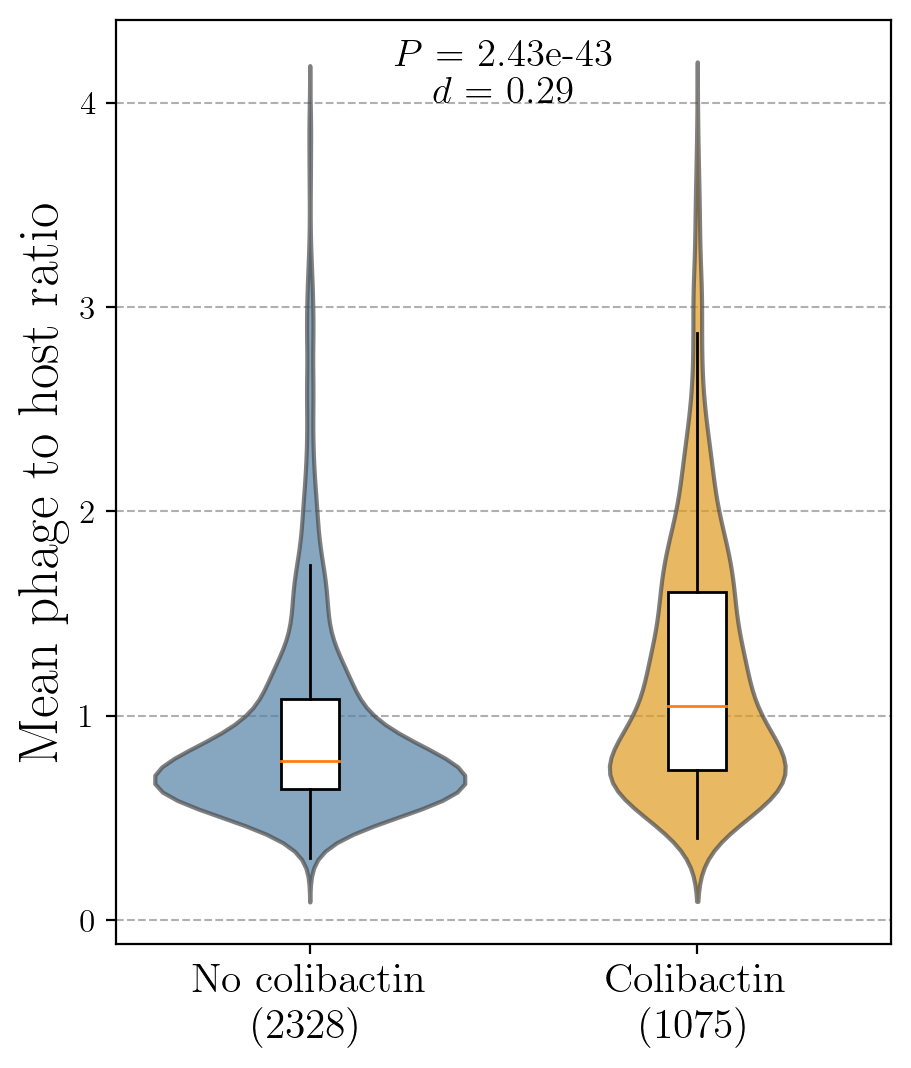

In [98]:
import seaborn as sns
from matplotlib import rc
from scipy.stats import mannwhitneyu

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

plt.figure(figsize=(5, 6), dpi=200)
ax = plt.gca()

v = sns.violinplot(x="has_colibactin", y="ratio", data=mean_ratio_df[mean_ratio_df["ratio"] < 4], ax=ax, inner=None,
               palette={True: "orange", False : "steelblue"})
plt.setp(ax.collections, alpha=0.7)

a, b = mean_ratio_df[~mean_ratio_df["has_colibactin"]]["ratio"], mean_ratio_df[mean_ratio_df["has_colibactin"]]["ratio"]

box = ax.boxplot([a, b], 
                 patch_artist=True,
           positions=[0, 1], showfliers=False, widths=0.15, 
           capwidths=0,
           boxprops=dict(facecolor="white")
)

cliffs_delta, man_whitney_u_p_val = observeDifference(b, a)

p_text = (r"$P <$ " + str(np.nextafter(0, 1))) if man_whitney_u_p_val == 0 else (
    r"$P$ = " + str(np.format_float_scientific(man_whitney_u_p_val, precision=2))
)

num_has = mean_ratio_df["has_colibactin"].sum()
num_no_has = mean_ratio_df.shape[0] - mean_ratio_df["has_colibactin"].sum()

ax.set_xticks([0, 1], labels=[f"No colibactin\n({num_no_has})", f"Colibactin\n({num_has})"])

ax.text(0.5, 0.95, p_text, fontsize=14,
    horizontalalignment='center', transform=ax.transAxes
)
ax.text(0.5, 0.91, f"$d$ = {'%.2f' % cliffs_delta}", fontsize=14,
    horizontalalignment='center', transform=ax.transAxes
)

v.tick_params(axis="y", labelsize=12)
v.tick_params(axis="x", labelsize=15)
ax.yaxis.label.set_size(20)
ax.set_axisbelow(True)
ax.grid(linestyle = '--', axis="y", linewidth = 0.75)
ax.set_xlabel("")
ax.set_ylabel("Mean phage to host ratio")

fig.subplots_adjust(wspace=0.5)


plt.savefig(os.path.join(config.FIGURE_DIR, "colibactin_phage_host_ratio.pdf"))


In [238]:
ptr = pd.read_csv(os.path.join(config.CLEAN_DIR, "ptr.csv"), index_col=0).T

In [258]:
mean_ptr = pd.DataFrame(ptr.replace(0, np.nan).mean(skipna=True, axis=1), columns=["Mean PTR"])
mean_ptr = mean_ptr[~mean_ptr["Mean PTR"].isna()]
mean_ptr

,Mean PTR
magic.0001,0.383492
magic.0004,0.392621
magic.0006,0.904895
magic.0007,0.556957
magic.0010,0.491696
...,...
magic.6595,0.540442
magic.6597,0.562960
magic.6598,0.416382
magic.6599,0.544784


In [ ]:
corr_df = pd.DataFrame()
corr_df["phage_sum"] = CAG[putative_phages].sum(axis=1)
corr_df["Phage richness"] = (CAG[putative_phages] > 0).sum(axis=1)
corr_df["CAG_sum"] = CAG.sum(axis=1)
corr_df["MGS_sum"] = CAG.iloc[:, :150].sum(axis=1)
corr_df["MGS richness"] = (CAG.iloc[:, :150] > 0.000001).sum(axis=1)
corr_df["phage_ratio"] = corr_df["phage_sum"] / corr_df["CAG_sum"]
corr_df

In [ ]:
all(CAG.index) == all(metadata.index)

In [ ]:
metadata["date_time"] = pd.to_datetime(metadata["Date_Collected"])

In [ ]:
counts.iloc[:145]

In [ ]:
corr_df["has_colibactin"] = metadata["has_colibactin"]

In [ ]:
from scipy.stats import ranksums
# from scipy.stats import wilcoxon


# for week in metadata["Timeline_Weeks"].unique():
#     print(week)
#     week_df = corr_df[metadata["Timeline_Weeks"] == week]

corr_df2 = corr_df.copy()
# corr_df2 = corr_df2[~metadata["Timeline_Weeks"].isna()]
    
has = corr_df2[metadata["has_colibactin"]]
no_has = corr_df2[~metadata["has_colibactin"]]

# has = week_df[metadata["has_colibactin"]]
# no_has = week_df[~metadata["has_colibactin"]]

info_dict = []

for col in tqdm(corr_df.columns):
    info = ranksums(has[col], no_has[col])

#     info = wilcoxon(group1, group2)

    info_dict.append({
        "CAG" : col,
        "stat" : info.statistic,
        "pvalue" : info.pvalue
    })

CAG_df = pd.DataFrame(info_dict)
CAG_df = CAG_df.set_index("CAG")
CAG_df["sig"] = CAG_df["pvalue"] < 0.05


display(CAG_df)


In [ ]:
# ? plt.boxplot

In [ ]:
ranksums(has["MGS richness"], no_has["MGS richness"])

In [ ]:
has["MGS_sum"].median(), no_has["MGS_sum"].median()

In [ ]:
has["MGS richness"].median(), no_has["MGS richness"].median()

In [ ]:
def observeDifference(a, b):
    u, man_whitney_u_p_val = mannwhitneyu(a, b)
    cliffs_delta = (2 * u) / (a.shape[0] * b.shape[0]) - 1
    return cliffs_delta, man_whitney_u_p_val

In [ ]:
import seaborn as sns
from matplotlib import rc
from scipy.stats import mannwhitneyu

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

fig, axs = plt.subplots(ncols=2, figsize=(10, 6), dpi=200)
for ind, ax in zip(["Phage richness", "MGS richness"], axs):
# for ind, ax in zip(["MGS_richness", "MGS_sum"], axs):
    v = sns.violinplot(x="has_colibactin", y=ind, data=corr_df2, ax=ax, inner=None,
                   palette={True: "orange", False : "steelblue"})
    plt.setp(ax.collections, alpha=0.7)
    
    a, b = corr_df2[~corr_df2["has_colibactin"]][ind], corr_df2[corr_df2["has_colibactin"]][ind]
    
    box = ax.boxplot([a, b], 
                     patch_artist=True,
               positions=[0, 1], showfliers=False, widths=0.2, 
               capwidths=0,
               boxprops=dict(facecolor="white")
    )
    
    cliffs_delta, man_whitney_u_p_val = observeDifference(b, a)
    
    p_text = (r"$P <$ " + str(np.nextafter(0, 1))) if man_whitney_u_p_val == 0 else (
        r"$P$ = " + str(np.format_float_scientific(man_whitney_u_p_val, precision=2))
    )
    
    num_has = has.shape[0]
    num_no_has = no_has.shape[0]
    
    ax.set_xticks([0, 1], labels=[f"No colibactin\n({num_no_has})", f"Colibactin\n({num_has})"])
    
    ax.text(0.5, 0.95, p_text, fontsize=14,
        horizontalalignment='center', transform=ax.transAxes
    )
    ax.text(0.5, 0.91, f"$d$ = {'%.2f' % cliffs_delta}", fontsize=14,
        horizontalalignment='center', transform=ax.transAxes
    )
    
    v.tick_params(axis="y", labelsize=12)
    v.tick_params(axis="x", labelsize=15)
    ax.yaxis.label.set_size(20)
    ax.set_axisbelow(True)
    ax.grid(linestyle = '--', axis="y", linewidth = 0.75)
    ax.set_xlabel("")
fig.subplots_adjust(wspace=0.5)
plt.savefig(os.path.join(config.FIGURE_DIR, "colibactin_phages.pdf"))

In [ ]:
ranksums(metadata[metadata["has_colibactin"]]["depth"], metadata[~metadata["has_colibactin"]]["depth"])

In [ ]:
measure = "MGS_richness"

plt.scatter(np.ones(no_has.shape[0]) + np.random.normal(scale=0.1, size=no_has.shape[0]), no_has[measure], s=1)
plt.scatter(2 * np.ones(has.shape[0]) + np.random.normal(scale=0.1, size=has.shape[0]), has[measure], s=1)

# plt.ylim(-0.0001, 0.001)
# plt.ylim(-1, 50)
# plt.boxplot([no_has[measure], has[measure]], showfliers=False, widths=0.5, showmeans=True, meanline=True)
plt.boxplot([no_has[measure], has[measure]], showfliers=False, widths=0.5)

plt.show()

In [ ]:
measure = "phage_richness"

plt.scatter(np.ones(no_has.shape[0]) + np.random.normal(scale=0.1, size=no_has.shape[0]), no_has[measure], s=1)
plt.scatter(2 * np.ones(has.shape[0]) + np.random.normal(scale=0.1, size=has.shape[0]), has[measure], s=1)

# plt.ylim(-0.0002, 0.01)
plt.boxplot([no_has[measure], has[measure]], showfliers=False, widths=0.5)
plt.show()

In [ ]:
CAG_df[CAG_df["pvalue"] * 27818 < 0.05]

In [ ]:
CAG_df.sort_values("stat")

In [ ]:
pairs = []

for rel in tqdm(ass):
    host = rel["host"]
    dep = rel["dependent"]
#     if CAG_df.loc[dep]["pvalue"] < 0.05 and CAG_df.loc[host]["pvalue"] < 0.05:
#         display(CAG_df.loc[[host, dep]])
#         input()
    if CAG_df.loc[dep]["stat"] > 0 and CAG_df.loc[host]["stat"] < 0:
        if CAG_df.loc[dep]["pvalue"] < 0.05 and CAG_df.loc[host]["pvalue"] < 0.05:
            pairs.append((host, dep))

In [ ]:
print(pairs)

In [ ]:
for p in pairs:
    display(CAG_df.loc[list(p)])

In [ ]:
clusters.loc["CAG25703"]

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5), dpi=200)
CAG_df.loc[putative_phages]['stat'].plot.hist(bins=100)
(CAG_df.loc[putative_phages]['stat'] > 0).mean()

In [ ]:
corr_df = CAG.copy()
corr_df["has_colibactin"] = metadata["has_colibactin"]
corr_df

In [ ]:
from tqdm import tqdm

corr = {}

at_time = corr_df[metadata["Timeline_Weeks"] == "0"]

for col in tqdm(corr_df.columns):
    corr[col] = corr_df[[col, "has_colibactin"]].corr().iloc[0, 1]

In [ ]:
CAG_corr = pd.DataFrame(corr, index=['corr']).T
CAG_corr

In [ ]:
CAG_corr.sort_values("corr", ascending=False).head(20)

In [ ]:
CAG_corr

In [ ]:
clusters.loc["CAG12883"]

In [ ]:
corr_df["depth"] = metadata["depth"]
corr_df.head()

In [ ]:
clusters = pd.read_csv(os.path.join(config.RAW_DIR, "clusters_allgenes_inputfilter.txt"), sep="\t", index_col=0, header=None)
clusters

In [ ]:
phage = pd.read_csv(os.path.join(config.RAW_DIR, "phage.txt"), header=None)

In [ ]:
phage_set = set(list(phage.values.flatten()))
phage_set

In [ ]:
phage_content = {}
for c in tqdm(CAG.columns):
    phages = 0
    for g in clusters.loc[c].values.flatten():
        if g in phage_set:
            phages += 1
    phage_content[c] = phages / clusters.loc[c].shape[0]

In [ ]:
phage_prop = pd.DataFrame(phage_content, index=['phage_prop']).T
phage_prop

In [ ]:
putative_phages = phage_prop[phage_prop["phage_prop"] >= 0.25].index
putative_phages

In [ ]:
counts = clusters.groupby(level=0).count()
counts

In [ ]:
corr_vs_phage_content = CAG_corr.loc[putative_phages].copy()
corr_vs_phage_content["phage_prop"] = phage_prop.loc[putative_phages]
corr_vs_phage_content["size"] = counts.loc[putative_phages]
corr_vs_phage_content

In [ ]:
corr_vs_phage_content.sort_values("size", ascending=False).head(20)

In [ ]:
corr_vs_phage_content.corr()

In [ ]:
clusters.loc["CAG08990"]

In [ ]:
CAG_corr.sort_values("corr")

In [ ]:
for rel in ass_dict_retained:
    host, dep = rel["host"], rel["dependent"]
    host_corr = CAG_corr.loc[host]["corr"]
    dep_corr =  CAG_corr.loc[dep]["corr"]
    if host_corr < -0.01 and dep_corr > 0.01:
        print(host, host_corr)
        print(dep, dep_corr)
        print()

In [ ]:
corr_df["phage_sum"] = (CAG.loc[in_both][putative_phages]).sum(axis=1)
corr_df

In [ ]:
corr_df["total_CAG_abundance"] = (CAG.loc[in_both]).sum(axis=1)
corr_df

In [ ]:
corr_df[["has_colibactin", "phage_sum", "depth", "total_CAG_abundance"]].corr()

In [ ]:
for t in metadata["Timeline_Weeks"].unique():
    print(t)
    at_t = metadata[metadata["Timeline_Weeks"] == t].index
    display(corr_df.loc[at_t][["has_colibactin", "phage_sum", "depth", "total_CAG_abundance", "phage_host_ratio", "dependent_sum"]].corr())
    input()

In [ ]:
import pickle

with open(os.path.join("../output/logs", "association_dict_prop.pkl"), "rb") as f:
    ass = pickle.load(f)
ass

In [ ]:
clusters = pd.read_csv(os.path.join(config.RAW_DIR, "clusters_allgenes_inputfilter.txt"), sep="\t", index_col=0, header=None)
clusters

In [ ]:
p_cutoff = 0

ass_dict_retained = [a for a in ass if a["p"] <= p_cutoff]

len(ass_dict_retained)

In [ ]:
ass_dict_retained

In [ ]:
def phage_like(cag):
    num_phage = len([g for g in clusters.loc[cag].values.flatten() if g in phage_set])
    return num_phage / clusters.loc[cag].shape[0] > 0
    
phage_like("CAG00233")

In [ ]:
hosts = {a["host"] for a in ass_dict_retained if phage_like(a["dependent"])}
dependent = {a["dependent"] for a in ass_dict_retained if phage_like(a["dependent"])}
len(hosts), len(dependent)

In [ ]:
len(dependent)

In [ ]:
corr_df["host_sum"] = (CAG.loc[in_both][hosts]).sum(axis=1)
corr_df["dependent_sum"] = (CAG.loc[in_both][dependent]).sum(axis=1)
corr_df

In [ ]:
corr_df["phage_host_ratio"] = corr_df["dependent_sum"] / corr_df["host_sum"]
corr_df

In [ ]:
corr_df[["has_colibactin", "phage_sum", "host_sum", "phage_host_ratio", "dependent_sum"]].corr()